# Python language

## [Exceptions](https://docs.python.org/3.6/tutorial/errors.html#handling-exceptions)

    import sys

    try:
        f = open('myfile.txt')
        s = f.readline()
        i = int(s.strip())
    except OSError as err:
        print("OS error: {0}".format(err))
    except ValueError:
        print("Could not convert data to an integer.")
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise

## other

*reshaping*: rollaxis, reshape, squeeze, newaxis, expands_dims

*normalize*: no inbuilt function...

[printf string formatting](https://docs.python.org/3.4/library/stdtypes.html#printf-style-string-formatting)

*strings*: a string marked b'...' is actually a byte array, while a Unicode string is just '...', [cf here](http://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)

\* and \*\* operators : * unpacks a list into its elements, for instance for use as

    l = [4,5,6]
    print(*l, sep=', ', end=' -- end')

\*\* does the same except with a dictionary, and is used to pass named arguments to a function call. More on all this [here](http://stackoverflow.com/questions/2921847/python-once-and-for-all-what-does-the-star-operator-mean-in-python) (cf also the answer introducing extended call syntax, which has reference snippets; and the explanation on how to use that to make more flexible functions).

Comprehensions: the inside is a generator expression. Putting it between
* () will just stay a generator expression
* [] or list() will yield a list comprehension
* {} or set() yields a set comprehension
* in the shape {x: x*x for x in range(10)} or using dict((x, x*x) for x in range(10)) yields a dict comprehension
cf [SO answer on printing generator expression](http://stackoverflow.com/questions/5164642/python-print-a-generator-expression)
So to make a list out of a generator, you can call list(generator_object)

* iterator: has __next__() function
* iterable: has __iter__() function which returns an iterator (iterable = everything usable in for...in, eg list, file, string, list comprehension)
* generators: *iterables written with yield keyword; they go into suspended state once they reach the yield, until you call next again: then they execute until the next yield.* [SO answer to yield keyword](http://stackoverflow.com/questions/231767/the-python-yield-keyword-explained) read shortcut to grokking yield, better explained than most-voted answer which has imprecisions and shortcuts (eg omits the fact that for-loops start by calling iter, and then next on the iterator thus obtained)

## Immutable types ([source](https://docs.python.org/2/reference/datamodel.html))
- all descendents of numbers.Number
- immutable sequences, eg tuples, strings, unicode
- frozenset's
- code objects

When you try to assign to an immutable object, you silently create a new object.

## Mutable defaults: explanation of what's going on (based on [this](http://effbot.org/zone/default-values.htm))
- functions are objects
- the def statement is executable
- function parameters are function attributes, just like self.a is an attribute in a class
- the parameters therefore exist (but are undefined) as soon as the function is def'd
- the default value kicks in only if the parameter is undefined, ie the very first time the function is executed


The explanation of the inner loop callback UI bit is:
- integers are objects
- the for loop mutates that object
- the callback is def'd anew for each button, but uses the same i object

# Docstrings
the :type:, :param: style is from the Sphinx document generator. The resulting docstring is hard to read when read in source, so many orgz use the Google Style guide or Khan academy style guide, both based on PEP257. There is the Napoleon extension to parse Google style docstrings to Sphinx style before passing it to Sphinx, so that the developer can write Google style docstrings, and still produce Sphinx (eg HTML) documentation.

[**Numba caveats**](http://nbviewer.ipython.org/urls/raw.github.com/diezguerra/pydata-boston-numba-talk/master/Numba%2520caveats%2520%25E2%2580%2594%2520James%2520Powell%2520%26%2520Saul%2520Diez%25E2%2580%2593Guerra.ipynb) : no keyword arguments (only positional), no raise, no yield etc

# Numpy

*division*: in Python 3, / always means float division. To do integer division, use //.
in Python 2.x, // is integer division. / is the integer division too, unless you use from __future__ import division which will make / the float division.

*matrix division*:  
*solve* stands for nmupy.linalg.solve  
A solve(A,b) = b  
(in Matlab, A\b = solve(A,b))

Power : never ^ but  **
Array construction: array(value-list eg [3,8,5]) but ndarray(shape-list) eg ndarray([10, 3])
Array slicing: [start:end:stepsize] unlike Matlab

[Random sampling functions in Numpy](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

[Numpy array objects](http://docs.scipy.org/doc/numpy/reference/arrays.html)

numpy.save for pny format, numpy.savetxt(file, arr, delimiter='\t') for TSV

to append a row to an ndarray, use [np.append](http://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html)

    import numpy as np
    a=np.zeros(shape=(0,4))
    print(a)
    a = np.append(a, np.zeros(shape=(1,4)))
    print(a)
    # now a has got one row and 4 cols
*[]
[ 0.  0.  0.  0.]*

**Cholesky**: scipy.linalg.cholesky is giving you the upper-triangular decomposition by default, whereas np.linalg.cholesky is giving you the lower-triangular version. [source SO](http://stackoverflow.com/questions/16699163/what-is-the-difference-between-cholesky-in-numpy-and-scipy)



In [4]:
try:
    1/0
except ZeroDivisionError:
    print('caught')

caught


### Caveat on numerical precision

In [1]:
c = np.random.rand((10))
print('%.30g' % np.float64(c).sum())
print('%.30g' % np.float32(c).sum())

4.82451809350956661859299856587
4.8245182037353515625


Rounding errors can appear earlier than you think when using lower precision floats.  
This occurs with .sum() (which surely uses an accumulator in the array type) vs iterated addition onto an accumulator (which might have default ie float64 precision).

# plotting

## visualization libraries in Python

[example notebook](http://nbviewer.ipython.org/gist/wrobstory/1eb8cb704a52d18b9ee8/Up%20and%20Down%20PyData%202014.ipynb) with  Bokeh, Vincent, Folium, ggplot, matplotlib ...

there's also seaborn and mermaid

## general tip
* use %matplotlib inline and not ~~--pylab=inline : makes [Pylab figures inline in the Ipython notebook] (https://github.com/ipython/ipython/issues/2672/)~~
* or indeed, %matplotlib notebook to have to interactive thing

Jake van der Plas has an [old Matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/12_AdvancedMatplotlib.ipynb) which details the 4 ways of making subplots: fig.add_axes, fig.add_subplot, plt.subplots, plt.GridSpec

## object-oriented matplotlib

In [2]:
import numpy as np
a = np.random.rand(4,4)

%matplotlib inline
import matplotlib.pyplot as plt

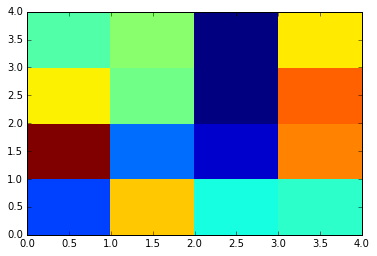

In [3]:
# matlab-style
plt.pcolor(a)

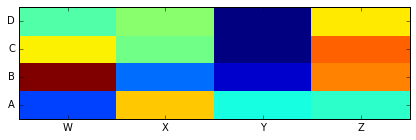

In [5]:
# object oriented
fig, ax = plt.subplots(figsize=(7,2));
ax.pcolor(a)

# and then possibly
ax.set_yticks(np.arange(a.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(a.shape[1])+0.5, minor=False)

column_labels = list('ABCD')
row_labels = list('WXYZ')

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False);



# IPython

[Markdown: Wikipedia example page](http://en.wikipedia.org/wiki/Markdown#Example). [Markdown cheat sheet](http://support.mashery.com/docs/customizing_your_portal/Markdown_Cheat_Sheet)


[autoreload](http://ipython.org/ipython-doc/dev/config/extensions/autoreload.html) : when you have Python modules in C:\WinPython-64bit-3.3.2.3\python-3.3.2.amd64\Lib , and you're editing them and want to interactively use them in an IPython notebook, you can autoreload them everytime you run "import module_name". Use 

    %load_ext autoreload
    %autoreload 2

for that.

Latex: cf http://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook

profile in Windows: C:\Users\bratieress\.ipython\profile_default
profile in Ubuntu: ~/.config/ipython/profile_default

[make server public/ secure](http://ipython.org/ipython-doc/rel-1.1.0/interactive/public_server.html#notebook-public-server)

Parallel: [can use %%px --local](http://stackoverflow.com/questions/14184621/how-to-work-with-interactively-defined-classes-in-ipython-parallel)



# Utilities

XML ElementTree is part of Python 3.3: [reference](http://docs.python.org/3.3/library/xml.etree.elementtree.html#)

Requests Library: just wasted half a day because requests-1.2.3 is broken, in that specifying Content-Type: application/octet-stream will result in Content-Type: application/x-www-form-urlencoded, application/octet-stream (as checked with www.requestb.in). Requests 2.0 (obtained by rebuilding from unreleased git branch) is hardly better, since it produces Content-Type: application/octet-stream, application/x-www-form-urlencoded. Haven't tried with urllib (python standard library). I became suspicious cos of [this post](http://stackoverflow.com/questions/18704429/python-requests-library-added-an-additional-header-accept-encoding-identity).

Regex [reference](http://docs.python.org/3/library/re.html#module-re)

[Memoization](http://stackoverflow.com/questions/1988804/what-is-memoization-and-how-can-i-use-it-in-python) example



# Python libraries

[Python module installation](http://docs.python.org/3/install/) : gist is, standard way is running the setup.py file found in the module

assert: in optimized code, will not be evaluated.

# Snippets

## CSV file read/ write##

In [ ]:
import csv
import codecs

with codecs.open(r'C:\Users\bratieress\Downloads\timetrak_nov_dec_2011.tsv','r', encoding='utf-8') as tsvin, codecs.open(r'C:\Users\bratieress\Downloads\out.tsv', 'wb', encoding='utf-8') as csvout:
    tsvin = csv.reader(tsvin, delimiter='\t')
    csvout = csv.writer(csvout, delimiter='\t')
    
    row_old = ['','','']
    for row_new in tsvin:
        if not ((row_new[1].lower() == row_old[1].lower()) or (row_new[1] == 'id')):
            if (row_old[2] == ''):
                row_old[2] = '3'
            print(row_old[:3])
            csvout.writerow(row_old[:3])
            row_old = row_new


## pickle RNG##

In [1]:
import pickle
import numpy.random

prng = numpy.random.RandomState(0)
print(prng.rand())

# save state
with open('prng.pickle', 'wb') as output_file:
    pickle.dump(prng, output_file)

# produce more randoms, changing the state
print(prng.rand())
print(prng.rand())

# restore state
with open('prng.pickle', 'rb') as output_file:
    prng = pickle.load(output_file)
    
print(prng.rand())


0.548813503927
0.715189366372
0.602763376072
0.715189366372


In [4]:
import pickle
import numpy as np
import numpy.random

prng = numpy.random.RandomState(0)

a = np.arange(100)

b = 5

with open('several_variables.pickle', 'wb') as output_file:
    pickle.dump({'prng': prng, 'a':a, 'b':b}, output_file)
    
prng = None
a=None
b=None
print(a)

with open('several_variables.pickle', 'rb') as output_file:
    dict = pickle.load(output_file)

prng = dict['prng']
a=dict['a']
b=dict['b']

print(b)
print(a)

import os
os.remove('several_variables.pickle')
!ls several_variables.pickle

None
5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
ls: cannot access several_variables.pickle: No such file or directory


### Memoization

In [64]:
# https://wiki.python.org/moin/PythonDecoratorLibrary/#Alternate_memoize_as_dict_subclass
# NB doesnt hash the arguments ! puts them in a dict !
class memoize(dict):
    def __init__(self, func):
        self.func = func

    def __call__(self, *args):
        return self[args]

    def __missing__(self, key):
        result = self[key] = self.func(*key)
        return result

#
# Sample use
#

@memoize
def foo(a, b):
    print('ran')
    return a * b, a

In [67]:
foo(2, 4)

ran


(8, 2)

In [31]:
foo(2,4)

(8, 2)

In [32]:
foo('hi',3)

ran


('hihihi', 'hi')

In [5]:
# will work with dict
# keeps only the last result in memory at any given time (useful for very big results)
# will hash input using str() function (cos it should work on small dicts)
class memoize_once(dict):
    def __init__(self, func):
        self.func = func

    def __call__(self, *args):
        h = str(args)
        if h in self :
            print("memo")
            return self[h]
        else:
            self.clear() # will clear dict before storing new key
            result = self[h] = self.func(*args)
            return result

In [6]:
def foo(a, b):
    print('ran')
    return a * b, a

foo_mo = memoize_once(foo)

### Make ndarrays hashable

The core of the problem is that ndarrays are mutable, and therefore you just shouldn't try to hash them. If you will take care yourself of not mutating the array, the you can hash the underlying data buffer. This code takes a view of the array and hashes that.  
Otherwise you can also do `a.flags.readonly = True`, and then you can `hash(a)`.

In [ ]:
import hashlib
class hashable(object): # from http://machineawakening.blogspot.co.at/2011/03/making-numpy-ndarrays-hashable.html
    r'''Hashable wrapper for ndarray objects.

        Instances of ndarray are not hashable, meaning they cannot be added to
        sets, nor used as keys in dictionaries. This is by design - ndarray
        objects are mutable, and therefore cannot reliably implement the
        __hash__() method.

        The hashable class allows a way around this limitation. It implements
        the required methods for hashable objects in terms of an encapsulated
        ndarray object. This can be either a copied instance (which is safer)
        or the original object (which requires the user to be careful enough
        not to modify it).
    '''
    def __init__(self, wrapped, tight=False):
        r'''Creates a new hashable object encapsulating an ndarray.

            wrapped
                The wrapped ndarray.

            tight
                Optional. If True, a copy of the input ndaray is created.
                Defaults to False.
        '''
        self.__tight = tight
        self.__wrapped = np.array(wrapped) if tight else wrapped
        self.__hash = int(hashlib.sha1(wrapped.view(np.uint8)).hexdigest(), 16) # takes a view, hashes that.

    def __eq__(self, other):
        return np.all(self.__wrapped == other.__wrapped)

    def __hash__(self):
        return self.__hash

    def unwrap(self):
        r'''Returns the encapsulated ndarray.

            If the wrapper is "tight", a copy of the encapsulated ndarray is
            returned. Otherwise, the encapsulated ndarray itself is returned.
        '''
        if self.__tight:
            return array(self.__wrapped)

        return self.__wrapped

# dict deepcopy

In [2]:
d = { 'a' :{'r' : 0}}
print(d)
b = d.copy() # creates shallow copy only: the dictionary is duplicated; the values are still object pointers to the objects from d
print(b)
b['a']['r'] = 5
print(b)
print(d) # it has changed d !

import copy
c = copy.deepcopy(d)
print(c)
c['a']['r'] = 8
print(c)
print(d) # d hasnt changed
print(b) # neither has b

{'a': {'r': 0}}
{'a': {'r': 0}}
{'a': {'r': 5}}
{'a': {'r': 5}}
{'a': {'r': 5}}
{'a': {'r': 8}}
{'a': {'r': 5}}
{'a': {'r': 5}}


# Mystery with numpy array element id's

In [4]:
import numpy as np
import copy
def set_lhp_target(lhp_, lhp_target):
    new_lhp = copy.deepcopy(lhp_)
    new_lhp["unary"] = lhp_target[0]
    new_lhp["binary"] = lhp_target[1]
    return new_lhp
def get_lhp_target(lhp_):
    return np.array([lhp_["unary"], lhp_["binary"]])

def log(b, msg=''):
    print("%s: id=%s, content=%s" % (msg, str(id(b)), str(b)))
    
a = np.array([0,1])
log(a, 'a')
log(a[0], 'a[0]')
d = {}
log(d, 'd')
d1 = set_lhp_target(d, a)
log(d1, 'd1')
log(d1["unary"], 'd1.unary')
l = [d1["unary"]]
log(l[0], 'l[0]')
k = np.array(l)
log(k[0], 'k.0')

k2 = np.array(l)
log(k2[0], 'k2.0')
log(k,'k')
log(k2, 'k2')

k[0]=2
print('k[0]=2')
log(k[0], 'k.0')
log(k2[0], 'k2.0')
# how can that be?
# k.0: id=140456829505376, content=2
# k2.0: id=140456829505376, content=0
log(k[0], 'k.0')
log(k,'k')
log(k[0], 'k.0')
log(k2, 'k2')
log(k[0], 'k.0')
print(k[0] is k2[0])

log(k[0], 'k.0')
log(k2[0], 'k2.0')
log(k,'k')
log(k2, 'k2')

b = get_lhp_target(d1)
log(b, 'b')
log(b[0], 'b[0]')

a[0] = 2
log(d1, 'd1')

a: id=139867588459136, content=[0 1]
a[0]: id=139867557059680, content=0
d: id=139867562931144, content={}
d1: id=139867671203720, content={'binary': 1, 'unary': 0}
d1.unary: id=139867557059680, content=0
l[0]: id=139867557059680, content=0
k.0: id=139867557059728, content=0
k2.0: id=139867557059728, content=0
k: id=139867588460336, content=[0]
k2: id=139867671225568, content=[0]
k[0]=2
k.0: id=139867557059728, content=2
k2.0: id=139867557059728, content=0
k.0: id=139867557059728, content=2
k: id=139867588460336, content=[2]
k.0: id=139867557059728, content=2
k2: id=139867671225568, content=[0]
k.0: id=139867557059728, content=2
False
k.0: id=139867557059752, content=2
k2.0: id=139867557059752, content=0
k: id=139867588460336, content=[2]
k2: id=139867671225568, content=[0]
b: id=139867671033936, content=[0 1]
b[0]: id=139867557059752, content=0
d1: id=139867671203720, content={'binary': 1, 'unary': 0}


# Demo for line and memory profiler 

In [3]:
%%file /tmp/foo.py
def bar(n):
    phrase = 'repeat me'
    pmul = phrase * n
    pjoi = ''.join([phrase for x in range(n)])
    pinc = ''
    for x in range(n):
        pinc += phrase
    del pmul, pjoi, pinc

Overwriting /xvdb/foo.py


In [4]:
import sys 
sys.path.append('/xvdb')
print(sys.path)

['', '/xvdb/anaconda3/lib/python35.zip', '/xvdb/anaconda3/lib/python3.5', '/xvdb/anaconda3/lib/python3.5/plat-linux', '/xvdb/anaconda3/lib/python3.5/lib-dynload', '/xvdb/anaconda3/lib/python3.5/site-packages/setuptools-18.4-py3.5.egg', '/xvdb/anaconda3/lib/python3.5/site-packages', '/xvdb/anaconda3/lib/python3.5/site-packages/IPython/extensions', '/home/ec2-user/.ipython', '/xvdb', '/xvdb']


In [5]:
import foo

In [6]:
foo


<module 'foo' from '/xvdb/foo.py'>

In [7]:
%load_ext line_profiler
%lprun -f foo.bar foo.bar(100000)

In [8]:
%load_ext memory_profiler
%mprun -f foo.bar foo.bar(1000)

In [9]:
%memit -r 3 [x for x in range(1000000)]

peak memory: 72.03 MiB, increment: 37.47 MiB


Now clean away the file we created:

In [10]:
!rm /tmp/foo.py